# Classification of MNIST hadnwritten data using two methods

## Classification using Logistic Regression from SkLearn








### Importing libraries and loading the data

In [1]:
#Load the dataset from sklearn datasets
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

MNIST dataset is downloaded from sklearn.datasets also you can download this from keras.datasets. 
MNIST dataset is used to classify the hand written digits from 0 to 9. It is widely used across several places for better understanding of classification problems


In [2]:
#import necessary functions from sklearn that perfroms preprocessing on the data
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Preprocessing

In [3]:
#Find the shape of the Image Data
print(X.shape)
#Print the shape of the labelled data
print(y.shape)

#Change the shape of labels array and convert the labels from string to integer
y= y.astype(int)
print(y)

(70000, 784)
(70000,)
[5 0 4 ... 4 5 6]


In [4]:
# Split the data into train and test
# X_train - Training images
# X_test - Testing images
# y_train - Training labels
# y_test - Testing labels
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=10000)

In [5]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(60000, 784) (10000, 784)
(60000,) (10000,)


Scaling step is optional, if you want to scale the data before feeding it to the model you can do it. Scaling improves the speed of convergence for certain optimization techniques like gradient descent and also weighing the features would be more standardized if we do scaling across all the training images. If we do scaling across training, we ofcourse have to do scaling across testing. 


In [6]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Visualizing the MNIST dataset

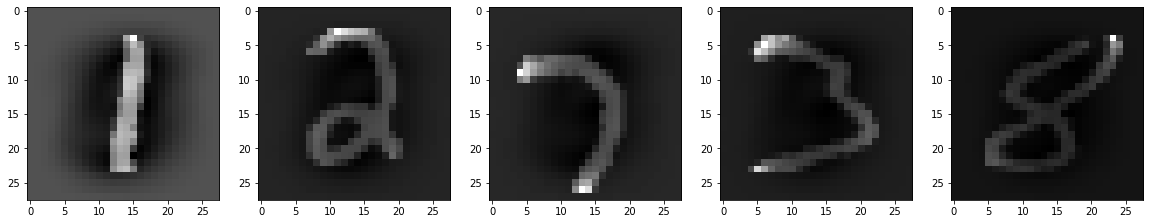

In [7]:
import numpy as np
import matplotlib.pyplot as plt


plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

### Logistic Regression using SkLearn's LogisticRegression() Function


Inititate the model and define the solver. SkLearn has multiple solvers for model convergence. SAGA - Stochastic Average Gradient Descent is similar to Stochastic Gradient Descent. In SAGA the avrage of the coefficients is considered while iterating the model. 


In [8]:
#Initialize the model with solver and necessary parameters. Here we selected the 'l1' norm for penalization.  
logistic_model = LogisticRegression(solver = 'saga', tol=0.01, penalty='l1')

In [9]:
#Fit the model to the training data for training labels
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=0,
                   warm_start=False)

Visualize the test data we wanted to predict and run the prediction on those images. 

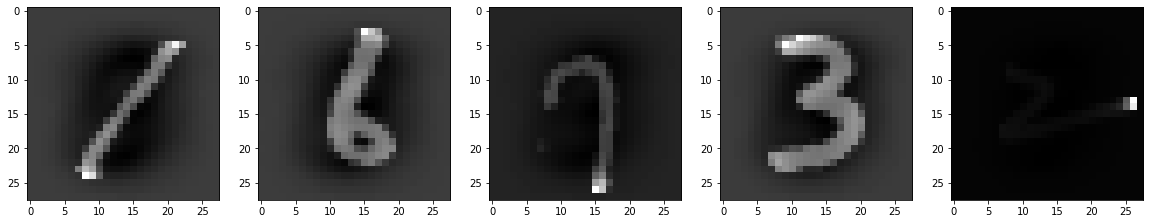

In [10]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)

In [11]:
logistic_model.predict(X_test[0:5])

array([1, 6, 7, 3, 6])

In [50]:
#Save the model
import pickle
filename = '/content/drive/MyDrive/Colab Notebooks/Logistic Regression/model_logistic_reg/logistic_regression_model.sav'
pickle.dump(logistic_model, open(filename, 'wb'))

Evaluate the model's performance and run the model on all the test images

In [12]:
#Running the model on all the test images
predictions_on_test_data = logistic_model.predict(X_test)

In [13]:
#Evaluate the model's performance
accuracy_Logistic_model = logistic_model.score(X_test,y_test)
print(accuracy_Logistic_model)

0.9137


# Classification using Artificial Neural Networks. 

## Import libraries and functions to build the network

In [36]:
#Importing tensorflow 
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

## Building the layers for the model

In [37]:
#Initialize the model
classification_model = Sequential()

In [38]:
#Add Hidden Layer 1
classification_model.add(Dense(input_dim = X_train.shape[1], units= 32, activation='relu', kernel_initializer='uniform'))


When we fit models on data like MNIST, there is a high chance that our model might undergo overfitting. So it is always good to have dropout layer in the middle to drop certain neurons while training so that only few neurons neurons doesn't learn only specific patterns. 

In [ ]:
classification_model.add(Dropout(0.2))

In [39]:
#Add Hidden Layer 2
classification_model.add(Dense(units = 16, kernel_initializer='uniform', activation='relu'))

In [40]:
#Add Ouput Layer
classification_model.add(Dense(units = 10, kernel_initializer='uniform', activation='softmax'))

## Compile the model and fit it to the training data

Use 'categorical_cross_entropy' if you are using your y_train as a one hot vectors (Encoding ytrain using on hot encoding). But, in this case we are having y_train as an integer array. In the above cells we convered the string labels to integers to use 'sparse_categorical_crossentropy'


In [41]:
#Compile the nueral network by adding optimzation function, loss function and accuracy metric
classification_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [42]:
#Display the parameters of our network
classification_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 32)                25120     
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_8 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [43]:
#Fit the model to the training data

classification_model.fit(X_train, y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4822 - sparse_categorical_accuracy: 0.8534
Epoch 2/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2848 - sparse_categorical_accuracy: 0.9149
Epoch 3/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2499 - sparse_categorical_accuracy: 0.9266
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2272 - sparse_categorical_accuracy: 0.9323
Epoch 5/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2131 - sparse_categorical_accuracy: 0.9356
Epoch 6/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2021 - sparse_categorical_accuracy: 0.9391
Epoch 7/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1931 - sparse_categorical_accuracy: 0.9396
Epoch 8/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1850 - sparse_categorical_accuracy: 0.9418
Epoch 9/15
1875/1875 [==========

In [47]:
#Save the model
classification_model.save('/content/drive/MyDrive/Colab Notebooks/Logistic Regression/model_ann/')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Colab Notebooks/Logistic Regression/model_ann/assets


## Evaluate the model

In [45]:
#Test the results on 5 observations
predicted_results_5_obs = classification_model.predict(X_test[0:5])
for i in range(5):
  print(predicted_results_5_obs[i].argmax())


1
6
7
3
2


In [46]:
#Evaluate the model's performance on whole test set
predicted_results = classification_model.evaluate(X_test, y_test)
print('Accuracy of ANN: %.2f' %(predicted_results[1]*100))

313/313 [==============================] - 0s 1ms/step - loss: 0.2116 - sparse_categorical_accuracy: 0.9568
Accuracy of ANN: 95.68
